# Assignment 3
### Due 9/23. Do four of five.

Maggie Crowner

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [5]:
import pandas as pd
import numpy as np

nhanes = pd.read_csv('data/nhanes_data_17_18.csv')
pd.set_option('display.max_rows', None)
nhanes.select_dtypes(include='object').head().T

/var/folders/cy/5ppsbsfx3wl0w61fygrcvc840000gn/T/ipykernel_19881/958623647.py:4: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes = pd.read_csv('data/nhanes_data_17_18.csv')


,0,1,2,3,4
GeneralHealthCondition,NaN,NaN,Good,Very good,Good
TypeOfMilkFirstFedWholeMilk,Whole or regular milk,Whole or regular milk,NaN,NaN,NaN
HowHealthyIsTheDiet,NaN,NaN,Good,Very good,NaN
Past30DayMilkProductConsumption,Often-once a day or more?,Sometimes-once a week or more but less than on...,Sometimes-once a week or more but less than on...,Never,Never
YouDrinkWholeOrRegularMilk,NaN,NaN,NaN,NaN,NaN
RegularMilkUse5TimesPerWeek,NaN,NaN,{My/His/Her} milk drinking has varied over {my...,NaN,NaN
HowOftenDrankMilkAge512,NaN,NaN,Often-once a day or more,NaN,NaN
HowOftenDrankMilkAge1317,NaN,NaN,Sometimes-once a week or more but less than on...,NaN,NaN
HowOftenDrankMilkAge1835,NaN,NaN,Sometimes-once a week or more but less than on...,NaN,NaN
SchoolLunchFreeReducedOrFullPrice,NaN,NaN,NaN,NaN,Reduced price


In [6]:
print("Total number of rows: ",nhanes.shape[0], '\n')

# HowHealthyIsTheDiet
print("NA values: ",nhanes['HowHealthyIsTheDiet'].isna().sum())
print(nhanes['HowHealthyIsTheDiet'].value_counts(),'\n')

# EducationLevelAdults20
print("NA values: ",nhanes['EducationLevelAdults20'].isna().sum())
print(nhanes['EducationLevelAdults20'].value_counts(),'\n')

Total number of rows:  8366 

NA values:  2540
HowHealthyIsTheDiet
Good         2283
Fair         1552
Very good    1157
Excellent     439
Poor          395
Name: count, dtype: int64 

NA values:  3103
EducationLevelAdults20
Some college or AA degree                             1689
College graduate or above                             1261
High school graduate/GED or equivalent                1251
9-11th grade (Includes 12th grade with no diploma)     598
Less than 9th grade                                    454
Don't Know                                              10
Name: count, dtype: int64 



In [7]:
pd.crosstab(nhanes['HowHealthyIsTheDiet'], nhanes['EducationLevelAdults20'], normalize='columns')

EducationLevelAdults20,9-11th grade (Includes 12th grade with no diploma),College graduate or above,Don't Know,High school graduate/GED or equivalent,Less than 9th grade,Some college or AA degree
HowHealthyIsTheDiet,,,,,,
Excellent,0.085284,0.101507,0.111111,0.059153,0.088106,0.058649
Fair,0.341137,0.147502,0.222222,0.283773,0.414097,0.264218
Good,0.337793,0.413957,0.666667,0.404476,0.330396,0.396327
Poor,0.100334,0.016653,0.000000,0.091926,0.059471,0.079976
Very good,0.135452,0.320381,0.000000,0.160671,0.107930,0.200829


Both variables have a considerable amount of NAs, but neither have drastically more than the other, so both still have a decent sample size to observe. Some pretty clear patterns can be observed in the contingency table above. A majority of responses that indicate a very good diet come from adults who have either graduated college or above, have had some college, or have an AA degree. A much smaller proportion of adults with very good diets come from those with only a high school education, and the smallest proportion comes from those who do not even have a high school education. This correlation holds true to more specific levels as well, with a better diet observed from those who graduated college as opposed to only some college. This shows a pretty clear correlation between diet and education level in adults over 20. 

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [8]:
nhanes.select_dtypes(include='float64').head().T

,0,1,2,3,4
SEQN,9.370300e+04,9.370400e+04,9.370500e+04,9.370600e+04,9.370700e+04
EverBreastfedOrFedBreastmilk,1.000000e+00,1.000000e+00,NaN,NaN,NaN
AgeStoppedBreastfeedingdays,2.730000e+02,6.000000e+01,NaN,NaN,NaN
AgeFirstFedFormuladays,1.000000e+00,3.000000e+00,NaN,NaN,NaN
AgeStoppedReceivingFormuladays,3.650000e+02,3.650000e+02,NaN,NaN,NaN
AgeStartedOtherFoodbeverage,1.520000e+02,1.260000e+02,NaN,NaN,NaN
AgeFirstFedMilkdays,3.650000e+02,3.650000e+02,NaN,NaN,NaN
TypeOfMilkFirstFed2Milk,NaN,NaN,NaN,NaN,NaN
TypeOfMilkFirstFed1Milk,NaN,NaN,NaN,NaN,NaN
TypeOfMilkFirstFedFatFreeMilk,NaN,NaN,NaN,NaN,NaN


In [9]:
print("Total number of rows: ",nhanes.shape[0], '\n')

# HowHealthyIsTheDiet
print("NA values: ",nhanes['HowHealthyIsTheDiet'].isna().sum())
print(nhanes['HowHealthyIsTheDiet'].value_counts(),'\n')

# AnnualHouseholdIncome
print("NA values: ",nhanes['AnnualHouseholdIncome'].isna().sum())
print(nhanes['AnnualHouseholdIncome'].describe(),'\n')

Total number of rows:  8366 

NA values:  2540
HowHealthyIsTheDiet
Good         2283
Fair         1552
Very good    1157
Excellent     439
Poor          395
Name: count, dtype: int64 

NA values:  1129
count      7237.000000
mean      53585.118143
std       32703.623008
min        2000.000000
25%       22500.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: AnnualHouseholdIncome, dtype: float64 



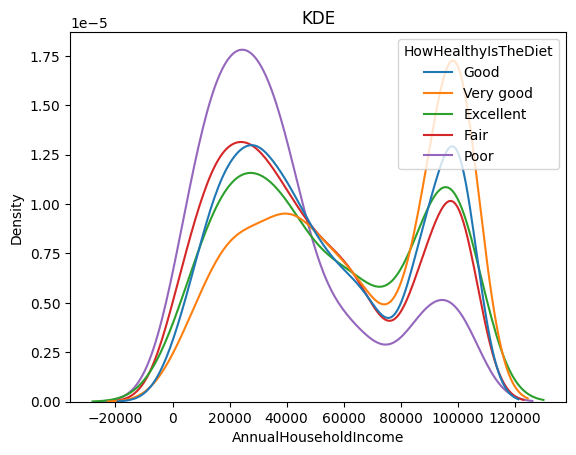

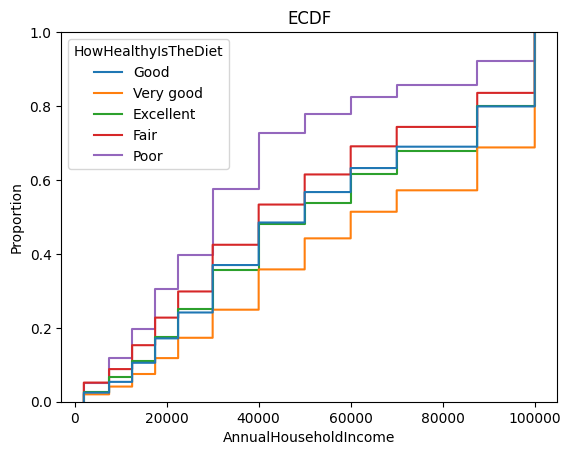

AnnualHouseholdIncome                                      \
                                    count          mean           std     min   
HowHealthyIsTheDiet                                                             
Excellent                           369.0  54444.444444  32652.281660  2000.0   
Fair                               1314.0  49036.149163  32230.870956  2000.0   
Good                               1955.0  53797.186701  32232.561038  2000.0   
Poor                                347.0  38079.250720  28030.514473  2000.0   
Very good                          1000.0  63182.500000  32572.133606  2000.0   

                                                           
                         25%      50%       75%       max  
HowHealthyIsTheDiet                                        
Excellent            22500.0  50000.0   87500.0  100000.0  
Fair                 22500.0  40000.0   87500.0  100000.0  
Good                 30000.0  50000.0   87500.0  100000.0  
Poor                 17500.0  30000.0   50000.0  100000.0  
Very good            40000.0  60000.0  100000.0  100000.0

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot( data=nhanes, x='AnnualHouseholdIncome', hue='HowHealthyIsTheDiet', common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes, x='AnnualHouseholdIncome', hue='HowHealthyIsTheDiet').set(title='ECDF')
plt.show()
nhanes.loc[:,['AnnualHouseholdIncome', 'HowHealthyIsTheDiet']].groupby('HowHealthyIsTheDiet').describe()

Both variables have a considerable amount of NAs, but both still have a decent sample size to observe. Patterns can be observed in the figures above, with the kernel density plot being the most interesting to observe. The kernel density plot is bimodal for all diet groups; however, the order that the groups fall in is almost entirely opposite for the peak around 25,000 annual household income and the peak around 100,000 annual household income. The greatest number of people around that $25,000 mark are reporting a poor diet, while the greatest amount of people around that $100,000 mark are reporting a very good diet. On the other hand, the least number of people around the $25,000 mark are reporting a very good diet, and the least number of people around the $100,000 mark are reporting a poor diet. What is also notable is that the density for these two income measures is approximately equal for those reporting an excellent diet, so evidently an excellent diet requires more of a commitment than just your income level. The table provides further evidence for this pattern, with the lowest mean income, as well as lowest IQR, belongs to the group reporting a poor diet. However, here we can see that those reporting an excellent diet have the highest mean annual household income. This shows a pretty clear correlation between diet and annual household income. 

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

$$

MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
\newline
\newline

\text{--> take derivative and set to 0 to minimize --> }

\newline
\newline

0 = \dfrac{d}{d \hat{y}(z)}(\dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right))

\newline
\newline
0 = \dfrac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right)(y_i - \hat{y}(z))

\newline
\newline

0 = \dfrac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right) y_i - \dfrac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right) \hat{y}(z)

\newline
\newline

\dfrac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right) \hat{y}(z) = \dfrac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right) y_i

\newline
\newline

\hat{y}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right) y_i}{\frac{1}{N} \sum_{i=1}^N 2\frac{1}{h}k\left(\frac{z-x_i}{h}\right)}

\newline
\newline

\hat{y}(z) = \dfrac{\frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left(\frac{z-x_i}{h}\right)}{\frac{1}{N} \sum_{i=1}^N \frac{1}{h}k\left(\frac{z-x_i}{h} \right)}

\newline
  
\newline

\text{--> this is the LCLS/Naradaya-Watson estimator! }


$$

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

college = pd.read_csv('data/college_completion.csv')

<Axes: xlabel='control', ylabel='aid_value'>

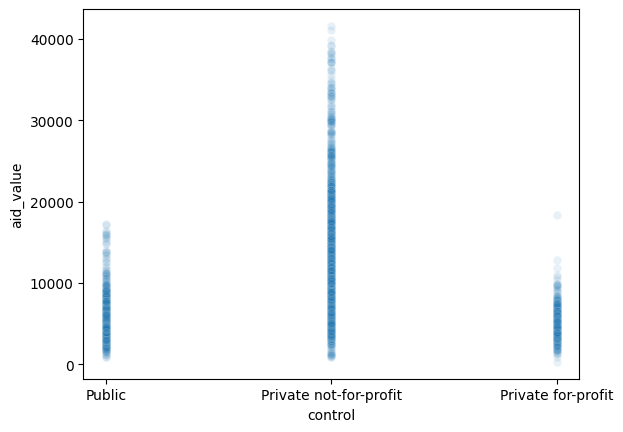

In [75]:
sns.scatterplot(data=college, x='control', 
                y='aid_value', alpha=.1)

<Axes: xlabel='control', ylabel='aid_value'>

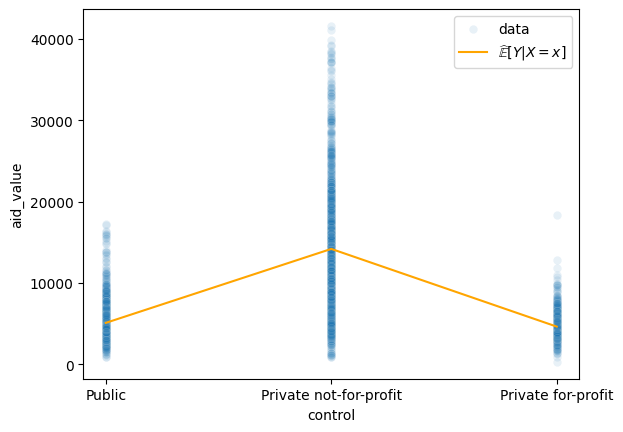

In [76]:
means = college.loc[:,['control', 'aid_value']].groupby('control').mean()
sns.scatterplot(data=college, x='control', 
                y='aid_value', alpha=.1, label='data')
sns.lineplot(data=means, x='control',y='aid_value',
             color='orange', label='$\\widehat{\\mathbb{E}}[Y|X=x]$')

There are certainly threats to causal identification in the comparison shown above. It appears that private not-for-profit institutions give more financial aid than public institutions and private for-profit institutions. This association does have clear evidence from the figures above, but causality cannot be determined from that alone. It is possible that the increase in aid value is due to the school size, endowment, prestige, tuition, region, or average wealth of the students that go to the school, among other possible confounding variables. These variables could explain part of why private not-for-profit institutions give higher financial aid values. However, this model can still be used to predict aid value given type of institution. The accuracy of this prediction may not be great in this particular scenario, but it is not because of the confounding variables. The prediction can be made regardless. However, this prediction cannot be interpreted as causation, only as a correlation or association. The results will still show what they show and be interesting to look into as long as you do not interfere in the results directly.